In [2]:
import numpy as np
import multiprocessing as mp
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import sys
sys.path.append("..")

import rascals
rascals.setupOorb()
from rascals import Config

In [100]:
surveyCenter = [200, 10]
fieldType = "square"
fieldArea = 10
surveyShape = [60, 20]
fieldOverlap = 0.0
coveragePerNight = 0.5

if fieldType == "square":
    # Calculate field width and height in x and y
    xField = np.sqrt(fieldArea)
    yField = np.sqrt(fieldArea)
    
    # Create arrays with field centers
    xCenters = np.linspace(surveyCenter[0] - (surveyShape[0] / 2) * (xField - fieldOverlap/2) + xField/2, 
                           surveyCenter[0] + (surveyShape[0] / 2) * (xField - fieldOverlap/2) - xField/2, 
                           surveyShape[0])
    yCenters = np.linspace(surveyCenter[1] - (surveyShape[1] / 2) * (yField - fieldOverlap/2) + yField/2, 
                           surveyCenter[1] + (surveyShape[1] / 2) * (yField - fieldOverlap/2) - yField/2, 
                           surveyShape[1])
    # Create meshgrid with centers
    x, y = np.meshgrid(xCenters, yCenters)
    
    # Create a more logical "snake" pointing sequence 
    # preferentially moving up and down in y before moving
    # in x
    xPointings = x.flatten(order="F")
    yPointingsTemp = np.flip(y, 0).flatten(order="F")
    yPointings = np.zeros(len(xPointings))
    
    for i in range(surveyShape[0]):
        if i % 2 == 0:
            yPointings[i * surveyShape[1] : (i + 1) * surveyShape[1]] = yPointingsTemp[i * surveyShape[1] : (i + 1) * surveyShape[1]]
        else:
            yPointings[i * surveyShape[1] : (i + 1) * surveyShape[1]] = np.flip(yPointingsTemp[i * surveyShape[1] : (i + 1) * surveyShape[1]], 0)
    
    
surveyCoverage = (xCenters[-1] - xCenters[0] + xField) * (yCenters[-1] - yCenters[0] + yField)
print(surveyCoverage)

12000.000000000002


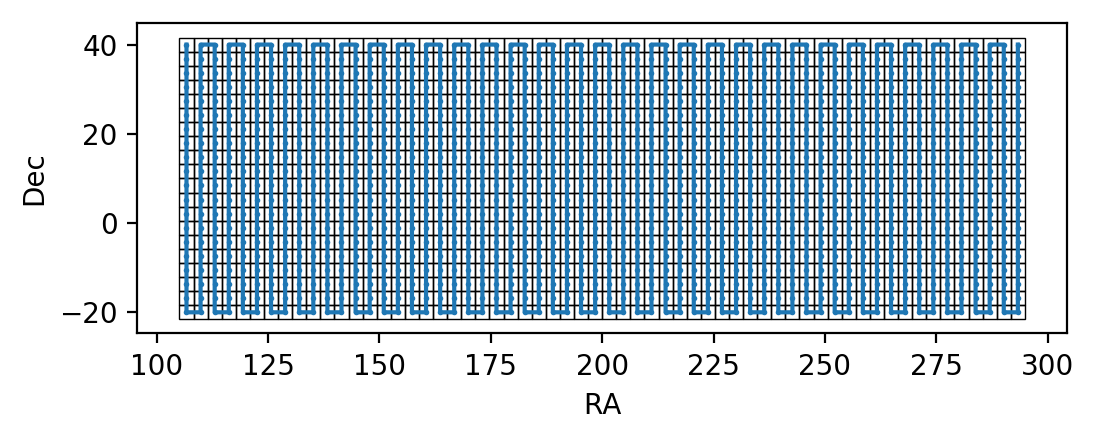

In [101]:
fig, ax = plt.subplots(1, 1, dpi=200)
ax.set_xlabel("RA")
ax.set_ylabel("Dec")
for xx, yy in zip(x.flatten(), y.flatten()):
    ax.add_patch(patches.Rectangle((xx-xField/2, yy-yField/2), xField, yField, fill=False, lw=0.5))
ax.scatter(x.flatten(), y.flatten(), s=1)
ax.plot(xPointings, yPointings)
ax.set_aspect("equal")

In [5]:
nights = 20
nightTime = [8, 8]

In [6]:
from astropy.time import Time

In [102]:
# UTC - 3
# Sunset in Cerro Pachon in June ~ 6 PM
# Sunrise in Cerro Pachon in June ~ 7:30 AM
t_start = Time(59740 + 3/24 - 4.5/24, format="mjd", scale="utc")
t_end = Time(59740 + 3/24 - 4.5/24 + 10/24, format="mjd", scale="utc")
delta_t = (t_end - t_start) / (surveyShape[1] * surveyShape[0] * coveragePerNight)

In [103]:
delta_t.sec

59.999999999650754

datetime.datetime(2022, 6, 9, 22, 30)

In [6]:
def convertMPCToOorb(mpcorbFile, oorbOutFile):
    subprocess.call(["oorb",
                     "--task=mpcorb",
                     "--mpcorb={}".format(mpcorbFile),
                     "--orb-out={}".format(oorbOutFile)])
    return
    
def propagateOrbits(oorbInFile, oorbOutFile, mjd):
    call = ["oorb", 
            "--task=propagation", 
            "--orb-in={}".format(oorbInFile),
            "--epoch-mjd-utc={}".format(mjd),
            "--orb-out={}".format(oorbOutFile)]
    subprocess.call(call)
    return
                
def generateEphemeris(oorbInFile, 
                      ephOutFile, 
                      observatoryCode=Config.oorbObservatoryCode, 
                      step=None, 
                      timespan=None):

SyntaxError: invalid syntax (<ipython-input-6-e7dc48ee4dd6>, line 15)

In [3]:
mpcorbFile = "MPCORB.DAT"
oorbOutFile = "MPCORB.orb"
convertMPCToOorb(mpcorbFile, oorbOutFile)